In [1]:
## Part 3

# Set-up, data import, and check

import numpy as np
import pandas as pd
import datetime as dt

from datetime import timedelta

import seaborn as sns

# Keeps warnings from cluttering up our notebook. 
#import warnings
#warnings.filterwarnings('ignore')

# Bring in quandl for downloading data
import quandl
# quandl.ApiConfig.api_key = 'YOUR_KEY_HERE'
quandl.read_key()



In [2]:
#Set-up GDP
gdp = quandl.get('FRED/GDP')
gdp.head()

gdp.index = gdp.index - timedelta(days=1)
gdp = gdp.resample('M').ffill()

gdp.rename(columns = {'Value':'gdp'}, inplace = True)

gdp

,gdp
Date,
1946-12-31,243.164
1947-01-31,243.164
1947-02-28,243.164
1947-03-31,245.968
1947-04-30,245.968
...,...
2021-05-31,22740.959
2021-06-30,23202.344
2021-07-31,23202.344


In [3]:
#Set-up UMich

umich = quandl.get('UMICH/SOC1')

umich.rename(columns = {'Index':'conf'}, inplace = True)
umich = umich.resample('M').ffill()

umich


,conf
Date,
1952-11-30,86.2
1952-12-31,86.2
1953-01-31,86.2
1953-02-28,90.7
1953-03-31,90.7
...,...
2021-09-30,72.8
2021-10-31,71.7
2021-11-30,67.4


In [4]:
# Set-up unrate

unrate = quandl.get('FRED/UNRATE')

unrate.info()

unrate.index = unrate.index - timedelta(days=1)

unrate = unrate.resample('M').ffill()

unrate.rename(columns = {'Value':'unrate'}, inplace = True)
unrate



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 1948-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   889 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


,unrate
Date,
1947-12-31,3.4
1948-01-31,3.8
1948-02-29,4.0
1948-03-31,3.9
1948-04-30,3.5
...,...
2021-08-31,4.7
2021-09-30,4.6
2021-10-31,4.2


In [5]:
# Part 4 - Join Together

df_inner = pd.merge(gdp, umich, how='inner', on='Date')
df_inner = pd.merge(df_inner, unrate, how='inner', on='Date')

df_inner


,gdp,conf,unrate
Date,,,
1952-11-30,380.812,86.2,2.7
1952-12-31,387.980,86.2,2.9
1953-01-31,387.980,86.2,2.6
1953-02-28,387.980,90.7,2.6
1953-03-31,391.749,90.7,2.7
...,...,...,...
2021-05-31,22740.959,82.9,5.9
2021-06-30,23202.344,85.5,5.4
2021-07-31,23202.344,81.2,5.2


In [6]:
df_outer = pd.merge(gdp, umich, how='outer', on='Date')
df_outer = pd.merge(df_outer, unrate, how='outer', on='Date')

df_outer

,gdp,conf,unrate
Date,,,
1946-12-31,243.164,NaN,NaN
1947-01-31,243.164,NaN,NaN
1947-02-28,243.164,NaN,NaN
1947-03-31,245.968,NaN,NaN
1947-04-30,245.968,NaN,NaN
...,...,...,...
2021-09-30,23992.355,72.8,4.6
2021-10-31,NaN,71.7,4.2
2021-11-30,NaN,67.4,3.9


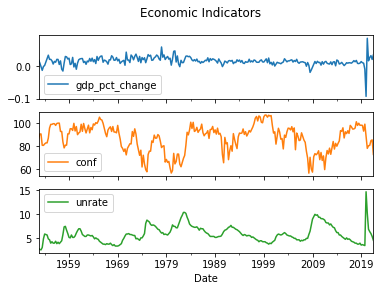

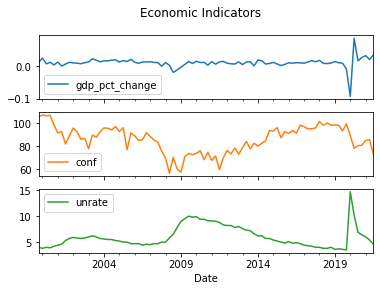

In [7]:
# Part 5 - Plot Using Pandas

df_inner['gdp_pct_change'] = df_inner['gdp'].pct_change()
df_inner['conf_pct_change'] = df_inner['conf'].pct_change()
df_inner['unrate_pct_change'] = df_inner['unrate'].pct_change()

df_inner_q = df_inner.asfreq('Q')
df_inner_q

df_inner_q[['gdp_pct_change', 'conf', 'unrate']].plot(subplots = True, title = 'Economic Indicators');

# Select just since December 1999

df_inner_q.loc['1999-12-31':,['gdp_pct_change', 'conf', 'unrate']].plot(subplots = True, title = 'Economic Indicators');


In [8]:
# Part 6 - Correlation

df_inner_q.corr()


,gdp,conf,unrate,gdp_pct_change,conf_pct_change,unrate_pct_change
gdp,1.000000,-0.038277,0.083334,-0.242450,0.134798,0.069639
conf,-0.038277,1.000000,-0.552944,-0.015374,0.058226,-0.039180
unrate,0.083334,-0.552944,1.000000,-0.051310,0.055101,0.297960
gdp_pct_change,-0.242450,-0.015374,-0.051310,1.000000,0.076351,-0.582502
conf_pct_change,0.134798,0.058226,0.055101,0.076351,1.000000,-0.195832
unrate_pct_change,0.069639,-0.039180,0.297960,-0.582502,-0.195832,1.000000


<AxesSubplot:>

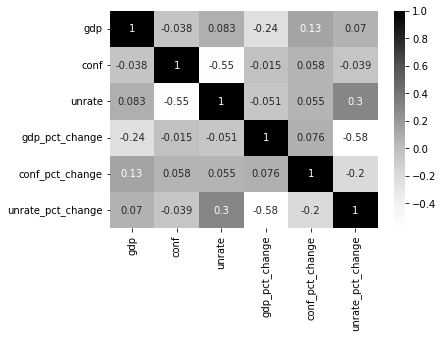

In [9]:
sns.heatmap(df_inner_q.corr(), annot = True, cmap = 'Greys')

In [10]:
# Part 7 - Wide to Long

df_inner_q.reset_index(inplace=True)


In [11]:
df_inner_q_long = df_inner_q.melt(id_vars = 'Date')

df_inner_q_long = df_inner_q.melt(id_vars = 'Date', var_name='indicator')



In [12]:
df_inner_q_long_levels = df_inner_q.melt(id_vars = 'Date', var_name='indicator', value_vars=['gdp', 'conf', 'unrate'])